**Reading the preprocessed data**

In [11]:
import pandas as pd
data = pd.read_csv("quora_preprocessed.csv")

**Importing libraries**

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (precision_score, recall_score, f1_score,accuracy_score,confusion_matrix)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [12]:
data=data.dropna()

**Train/test split**

In [5]:
x = data['ques_lemmatized']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

**TF-IDF Vectorizer**

In [14]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=100000)
vectoriser.fit(x_train)

x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

**Logistic Regression**

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Test accuracy: 0.9512


c:\Users\Pallavi\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
f1score=f1_score(y_test,y_pred)
print(f"F1 Score:{f1score:.4f}")

F1 Score:0.4958


**Confusion Matrix**

<AxesSubplot: >

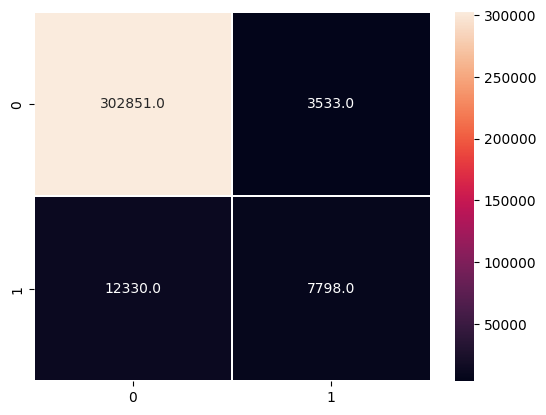

In [9]:
confusion_lg = confusion_matrix(y_test, y_pred) #confusion metrics
sns.heatmap(confusion_lg, linewidths=0.01, annot=True,fmt= '.1f', color='red')

**Multinomial Naive Bayes**

In [10]:
nb = MultinomialNB()

# Train the model
nb.fit(x_train, y_train)
# Evaluate the model on the test set
y_p = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_p)
f1score=f1_score(y_test,y_p)
print(f"Test accuracy: {accuracy:.4f}")
print(f"F1 Score:{f1score:.4f}")

Test accuracy: 0.9473
F1 Score:0.4116


**Stratified K-Fold Sampling for Imbalanced dataset**

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


In [6]:
x = data['ques_lemmatized'].values
y = data['target'].values

In [7]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
lst_f1score_stratified = []
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=100000)
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    lst_accu_stratified.append(accuracy)
    F1score = f1_score(y_test,y_pred)
    lst_f1score_stratified.append(F1score)


In [8]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')




List of possible accuracy: [0.9000957084338271, 0.8997511580720493, 0.8997205313732246, 0.899866008192642, 0.8993147276137974, 0.9012817371596582, 0.8995972558267741, 0.9004471532265474, 0.9009831245597378, 0.9000643165599829]

Maximum Accuracy That can be obtained from this model is: 90.12817371596581 %

Minimum Accuracy: 89.93147276137974 %

Overall Accuracy: 90.01121721018241 %


In [9]:
print('List of possible F1 Scores:', lst_f1score_stratified)
print('\nMaximum f1 score That can be obtained from this model is:',
      max(lst_f1score_stratified)*100, '%')
print('\nMinimum f1 score:',
      min(lst_f1score_stratified)*100, '%')
print('\nOverall f1score:',
      np.mean(lst_f1score_stratified)*100, '%')

List of possible F1 Scores: [0.5169196593854127, 0.5172019617242525, 0.5175170381285689, 0.5167750517292344, 0.5170412810342294, 0.5207241366491951, 0.5162147205312674, 0.5187296416938112, 0.5217455621301774, 0.5174504584442473]

Maximum f1 score That can be obtained from this model is: 52.174556213017745 %

Minimum f1 score: 51.62147205312674 %

Overall f1score: 51.80319511450395 %
